
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#00CED1;font-family:cursive;color:#FFF8DC;font-size:200%;text-align:center;border-radius:25px;"> 🚀 Let's Dive In 🌟🌟 </p>



<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#008080;font-family:Helvetica, Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> 📝 Introduction 📖 </p>

The rapid growth of online booking platforms has generated a wealth of data that, if analyzed effectively, can significantly boost operational efficiency and customer satisfaction. This project focuses on developing a suite of analytics to explore and visualize key performance indicators within a bookings dataset. Specifically, we analyze revenue trends over time, calculate the cancellation rate, examine the geographical distribution of users, and study the booking lead time distribution. These insights are essential for identifying patterns, understanding user behavior, and making informed decisions in areas such as marketing, inventory management, and customer retention.

By leveraging Python and popular data analysis libraries such as Pandas, Matplotlib, and Seaborn, this project transforms raw booking data into actionable business intelligence.

### 📂 **Dataset Description**

The dataset used in this analysis consists of records from a hotel or travel booking platform. It includes detailed information about individual bookings, such as booking dates, revenue, cancellation status, user location, and more.

### Load the packages

In [ ]:
#load the packages
# General packages and data visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
import time
import datetime
import pickle


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the csv file
data_path = "/content/drive/MyDrive/Buyogo/hotel_bookings.csv"
hotel_booking_data = pd.read_csv(data_path)

In [ ]:
hotel_booking_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#6A5ACD;font-family:Tahoma, Geneva, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> 📊 Data Preparation 📈 </p>

## info data

In [ ]:
hotel_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# show statistics for numerical variables
hotel_booking_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Handling Missing Data

In [ ]:
#Missing data
features_stat = hotel_booking_data.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(hotel_booking_data))
features_stat.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
24,company,112593,0.943069
23,agent,16340,0.136862
13,country,488,0.004087
10,children,4,0.000034
4,arrival_date_month,0,0.000000
5,arrival_date_week_number,0,0.000000
0,hotel,0,0.000000
1,is_canceled,0,0.000000
7,stays_in_weekend_nights,0,0.000000
6,arrival_date_day_of_month,0,0.000000


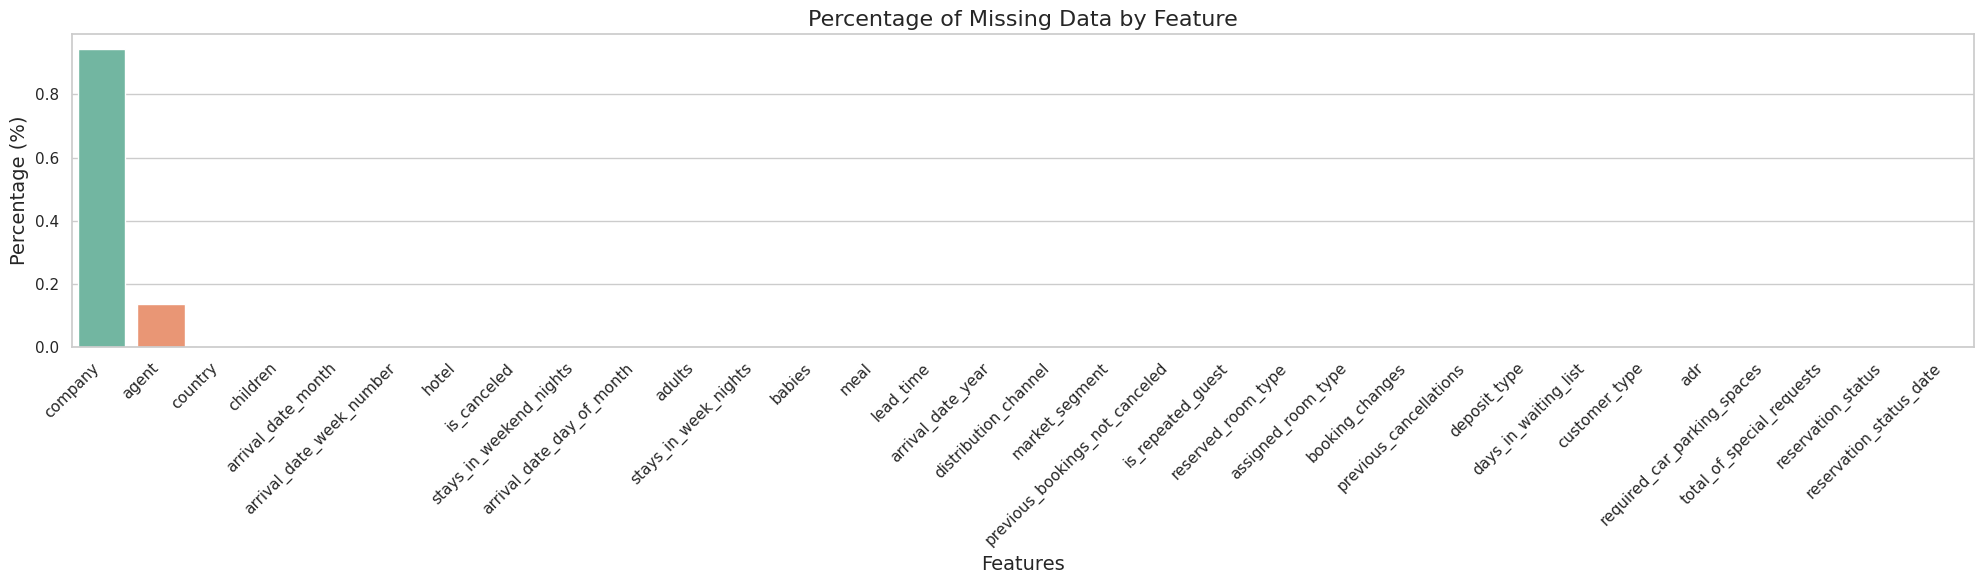

In [ ]:
plt.figure(figsize=(20, 6))

sorted_data = features_stat.sort_values(by='percentage_of_missings', ascending=False)

sns.barplot(x='feature', y='percentage_of_missings', data=sorted_data, palette='Set2')

plt.title('Percentage of Missing Data by Feature', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

From the above visualization and analysis we can see that the columns "agent" and "company" have significantly many missing values. There are also few missing values in "children" and "country".

as we can read from the description of the dataset, the null values of "agent" or company imply that the order is not from an agent or have no company. Thus, we replace the null values accordingly for better comprehension.

In [ ]:
# Create new categories for both the agent and the company column
hotel_booking_data['agent'] = hotel_booking_data['agent'].fillna(0)
hotel_booking_data['company'] = hotel_booking_data['company'].fillna(0)

In [ ]:
#Since it is impossible to find the missing values of "children", I will drop these as they are only a few rows of missing values.
hotel_booking_data = hotel_booking_data.dropna(subset=['children'], axis=0)
hotel_booking_data = hotel_booking_data.reset_index(drop=True)

In [ ]:
# Null values in the country column can be seen as unknown countries
hotel_booking_data['country'] = hotel_booking_data['country'].fillna('Unknown')

In [ ]:
#check if there is a missing data
features_stat = hotel_booking_data.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(hotel_booking_data))
features_stat.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
0,hotel,0,0.0
1,is_canceled,0,0.0
2,lead_time,0,0.0
3,arrival_date_year,0,0.0
4,arrival_date_month,0,0.0
5,arrival_date_week_number,0,0.0
6,arrival_date_day_of_month,0,0.0
7,stays_in_weekend_nights,0,0.0
8,stays_in_week_nights,0,0.0
9,adults,0,0.0


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#20B2AA;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;"> 🔄 Feature Engineering🤖 </p>
</div>

In [ ]:
# the number of children, agent, company should be interger
cols = ["children", "agent", "company"]
hotel_booking_data[cols] = hotel_booking_data[cols].applymap(np.int64)

In [ ]:
# transfer meal feature from symbol to words
meal_interpretation = {
    'BB' : "Breakfast",
    'FB' : "Full Board",
    'HB' : "Half Board",
    'SC' : "No meal",
    'Undefined' : "No meal"
}

hotel_booking_data["meal"] = hotel_booking_data["meal"].replace(meal_interpretation)
hotel_booking_data["meal"].unique()

# the type of "meal" should be a category
hotel_booking_data["meal"] = pd.Categorical(hotel_booking_data["meal"])

In [ ]:
data=hotel_booking_data.copy()

In [ ]:
# Converting string month to numerical one (Dec = 12, Jan = 1, etc.)
datetime_object = data['arrival_date_month'].str[0:3]
month_number = np.zeros(len(datetime_object))

# Creating a new column based on numerical representation of the months
for i in range(0, len(datetime_object)):
    datetime_object[i] = datetime.datetime.strptime(datetime_object[i], "%b")
    month_number[i] = datetime_object[i].month

# Float to integer conversion
month_number = pd.DataFrame(month_number).astype(int)

# 3 columns are merged into one
data['arrival_date'] = data['arrival_date_year'].map(str) + '-' + month_number[0].map(str) + '-' \
                       + data['arrival_date_day_of_month'].map(str)

# Dropping already used columns
data = data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
                  'arrival_date_week_number'], axis=1)
data.head()


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0,0,Breakfast,PRT,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
1,Resort Hotel,0,737,0,0,2,0,0,Breakfast,PRT,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
2,Resort Hotel,0,7,0,1,1,0,0,Breakfast,GBR,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
3,Resort Hotel,0,13,0,1,1,0,0,Breakfast,GBR,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
4,Resort Hotel,0,14,0,2,2,0,0,Breakfast,GBR,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-7-1


In [ ]:
# Converting wrong datatype columns to correct type (object to datetime)
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

print('Datatype of the arrival_date:', data['arrival_date'].dtype)
print('Datatype of the reservation_status_date:', data['reservation_status_date'].dtype)

Datatype of the arrival_date: datetime64[ns]
Datatype of the reservation_status_date: datetime64[ns]


In [ ]:
# Calculating total guests for each record
data['Total Guests'] = data['adults'] + data['children']

# Some data points include zero Total Guests, therefore I dropped them
data = data[data['Total Guests'] != 0]

# Total Number of Days Stayed
data['Total Stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

dataNoCancel = data[data['is_canceled'] == 0]
dataNoCancel = dataNoCancel.reset_index(drop=True)

NumberOfGuests = dataNoCancel[['arrival_date', 'Total Guests']]

NumberOfGuests

,arrival_date,Total Guests
0,2015-07-01,2
1,2015-07-01,2
2,2015-07-01,1
3,2015-07-01,1
4,2015-07-01,2
...,...,...
75006,2017-08-30,2
75007,2017-08-31,3
75008,2017-08-31,2
75009,2017-08-31,2


In [ ]:
# Calculating Number of Guests Daily - Hotel
NumberOfGuests = dataNoCancel[['arrival_date', 'Total Guests']]
NumberOfGuests_Daily = dataNoCancel['Total Guests'].groupby(dataNoCancel['arrival_date']).sum()
NumberOfGuests_Daily = NumberOfGuests_Daily.resample('d').sum().to_frame()
NumberOfGuests_Daily

,Total Guests
arrival_date,
2015-07-01,188
2015-07-02,73
2015-07-03,77
2015-07-04,94
2015-07-05,80
...,...
2017-08-27,265
2017-08-28,247
2017-08-29,150


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
  <p style="background-color:#20B2AA;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;"> EDA Analysis 🤔 </p>
</div>

## Number of hotel guests per day

In [ ]:
lis=[]
for x in NumberOfGuests_Daily.index:
    lis.append(x.day_name())
days = pd.DataFrame(lis,columns =['Day'])

NumberOfGuestsDaily=NumberOfGuests_Daily.copy()
NumberOfGuestsDaily.reset_index(drop=True, inplace=True)

NumberOfGuestsDaily = NumberOfGuestsDaily.join(days)
NumberOfGuestsDaily

,Total Guests,Day
0,188,Wednesday
1,73,Thursday
2,77,Friday
3,94,Saturday
4,80,Sunday
...,...,...
788,265,Sunday
789,247,Monday
790,150,Tuesday
791,127,Wednesday


<Axes: title={'center': 'Guests per week day.'}, xlabel='Day', ylabel='Total Guests'>

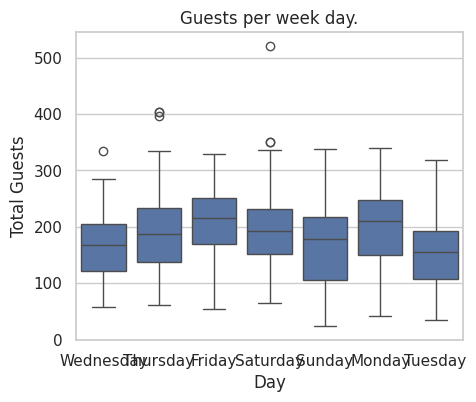

In [ ]:
plt.title("Guests per week day.")
sns.boxplot(x="Day", y="Total Guests", data=NumberOfGuestsDaily)

In [ ]:
lis=[]
for x in NumberOfGuests_Daily.index:
    lis.append(x.month_name())
days = pd.DataFrame(lis,columns =['Day'])

NumberOfGuestsMonthly=NumberOfGuests_Daily.copy()
NumberOfGuestsMonthly.reset_index(drop=True, inplace=True)

NumberOfGuestsMonthly = NumberOfGuestsMonthly.join(days)
NumberOfGuestsMonthly.rename(columns = {'Day':'Month'}, inplace = True)
NumberOfGuestsMonthly

,Total Guests,Month
0,188,July
1,73,July
2,77,July
3,94,July
4,80,July
...,...,...
788,265,August
789,247,August
790,150,August
791,127,August


<Axes: title={'center': 'Guests per Months'}, xlabel='Month', ylabel='Total Guests'>

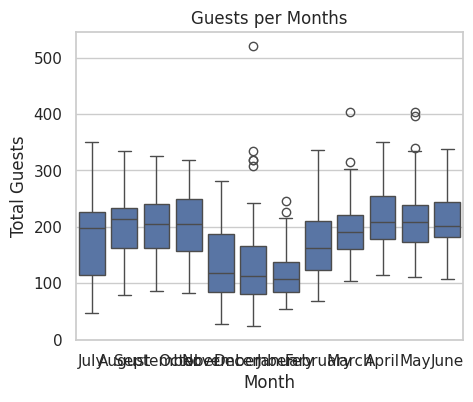

In [ ]:
plt.title("Guests per Months")
sns.set(rc={"figure.figsize":(20, 10)})
sns.boxplot(x="Month", y="Total Guests", data=NumberOfGuestsMonthly)

## Number of guests in each month

Text(0, 0.5, 'No. of guests')

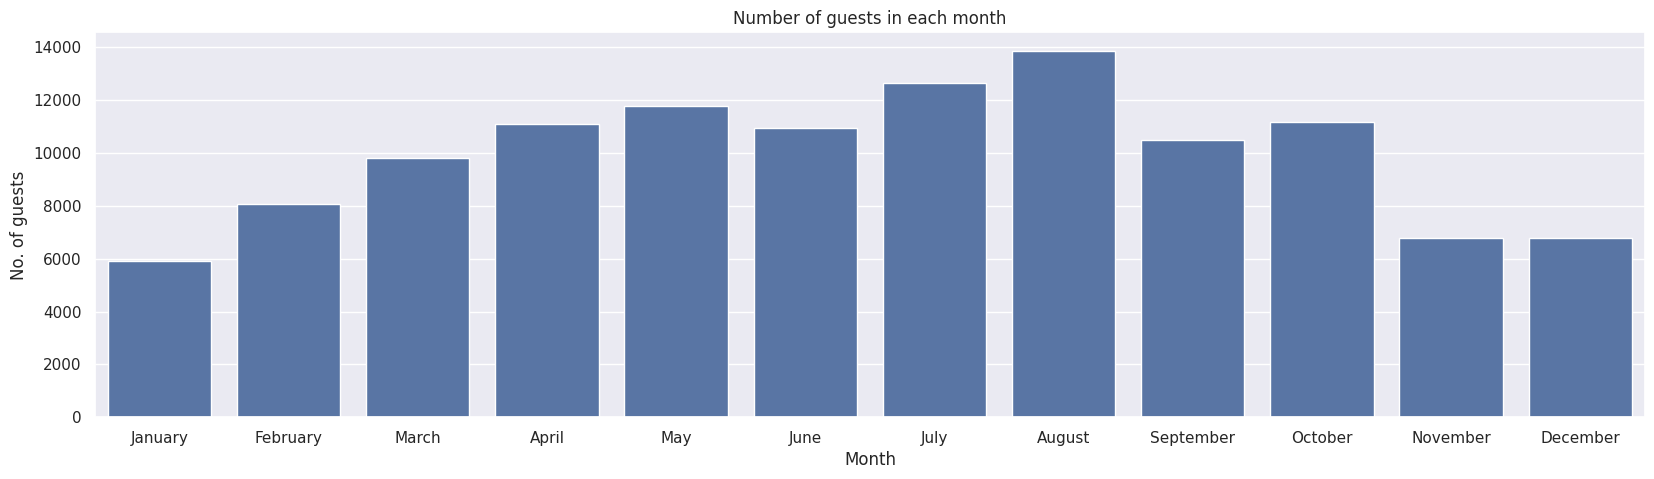

In [ ]:
plt.figure(figsize=(20,5))


sns.countplot(data = hotel_booking_data, x= "arrival_date_month",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Number of guests in each month')
plt.xlabel('Month')
plt.ylabel('No. of guests')

As expected, the summer months (from May to August) are the most busy months for the hotels, so we need more workers than other months

## Type of meal booked

In [ ]:
meal_labels= ['Breakfast','Half Board', 'No Meal', 'Full Board']

def draw_meal_circle(hotel_booking_data):
    main_meal = hotel_booking_data['meal'].value_counts()
    cmap =plt.get_cmap("Set1")
    colors = cmap(np.arange(6)*1)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(main_meal, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    p=plt.gcf()
    p.gca().add_artist(my_circle)

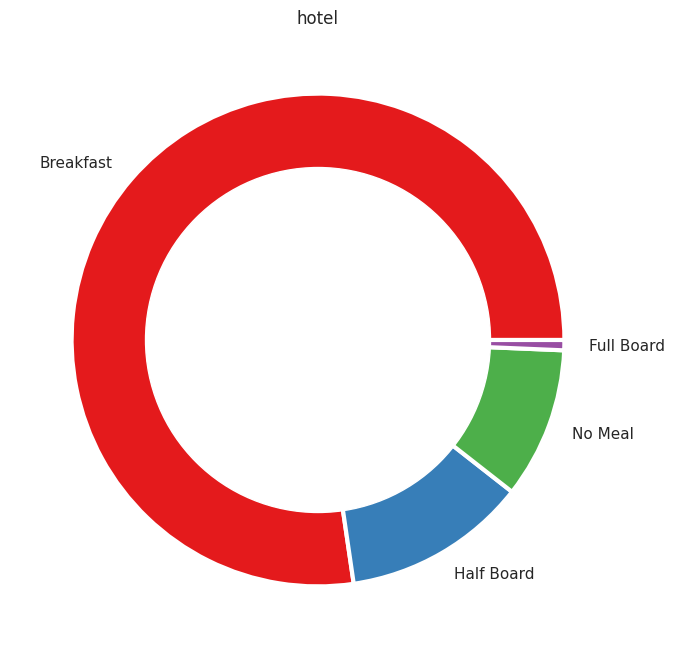

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,8))
draw_meal_circle(hotel_booking_data)
plt.title("hotel")
plt.show()

One can see that the breakfast have demand more so we restaurant need more workers at this period

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
  <p style="background-color:#FF6347;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;"> Revenue trends over time 🧪 </p>
</div>

### Monthly Revenue Trends

In [ ]:
df=hotel_booking_data.copy()

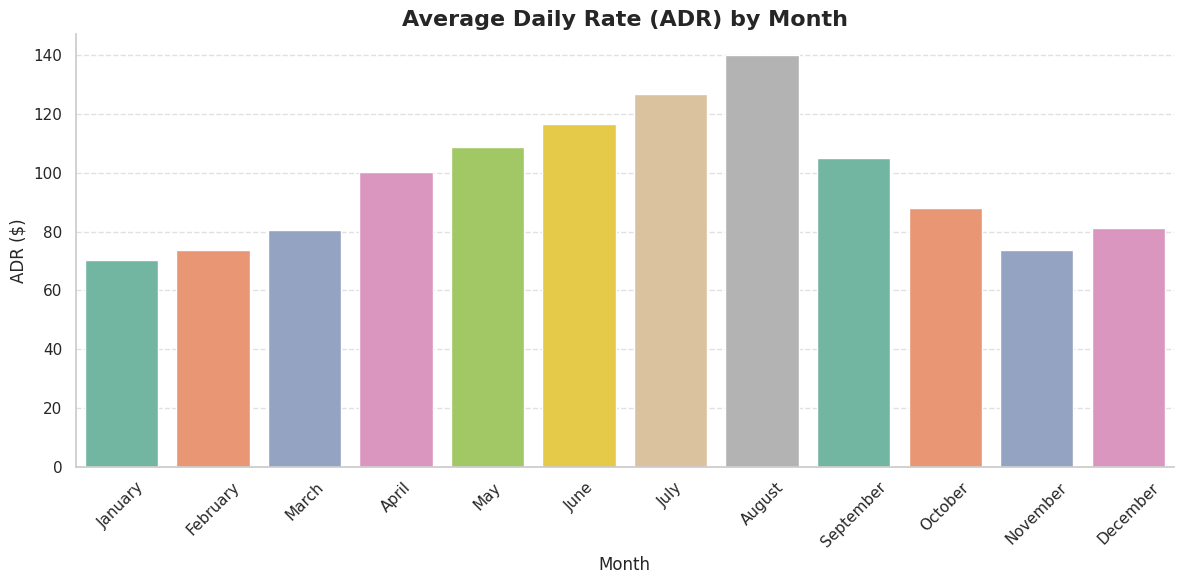

In [ ]:
# Group by month and calculate mean ADR
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reset_index()

# Order months correctly (Jan-Dec)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_adr['arrival_date_month'] = pd.Categorical(monthly_adr['arrival_date_month'], categories=month_order, ordered=True)
monthly_adr = monthly_adr.sort_values('arrival_date_month')

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_adr,
    x='arrival_date_month',
    y='adr',
    palette='Set2'
)

plt.title("Average Daily Rate (ADR) by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("ADR ($)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

Peak seasons: Highest ADR in July-August (summer)

Low seasons: Lowest ADR in January-February (post-holiday slump)



### Year Revenue Growth


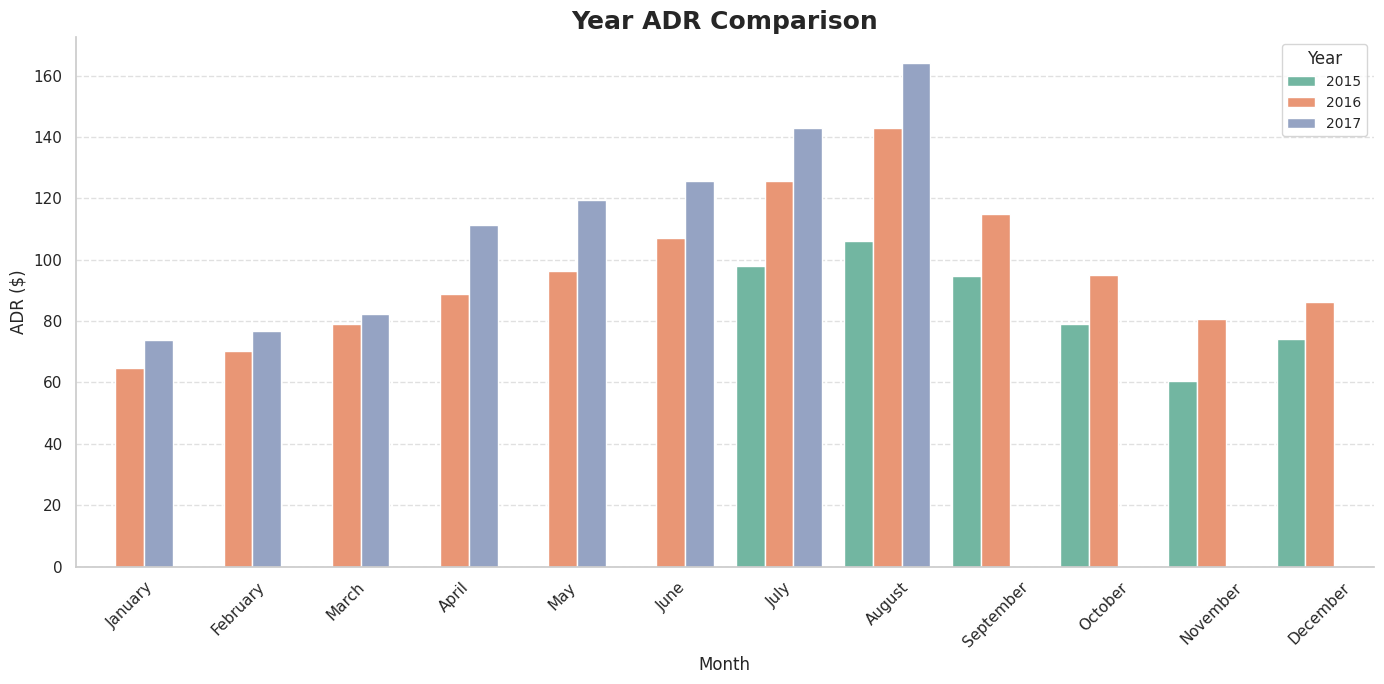

In [ ]:
yearly_monthly_adr = df.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].mean().reset_index()
yearly_monthly_adr['arrival_date_month'] = pd.Categorical(yearly_monthly_adr['arrival_date_month'], categories=month_order, ordered=True)
yearly_monthly_adr = yearly_monthly_adr.sort_values(['arrival_date_year', 'arrival_date_month'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.barplot(
    data=yearly_monthly_adr,
    x='arrival_date_month',
    y='adr',
    hue='arrival_date_year',
    palette='Set2'
)

plt.title("Year ADR Comparison", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("ADR ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Year', title_fontsize=12, fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

Yearly growth: ADR increased from 2016 to 2017, indicating inflation or higher demand.

Consistent peaks: Summer remain high-revenue periods every year.

# <div style="color: blue; display:inline-block; border-radius: 5px; background-color: #F0E68C; font-family: 'Nexa', sans-serif; overflow: hidden;"><p style="padding: 15px; color: blue; overflow: hidden; font-size: 100%; letter-spacing: 0.5px; margin: 0; width: 750px;"><b>Cancellation Impact on Revenue</b></p>
</div>

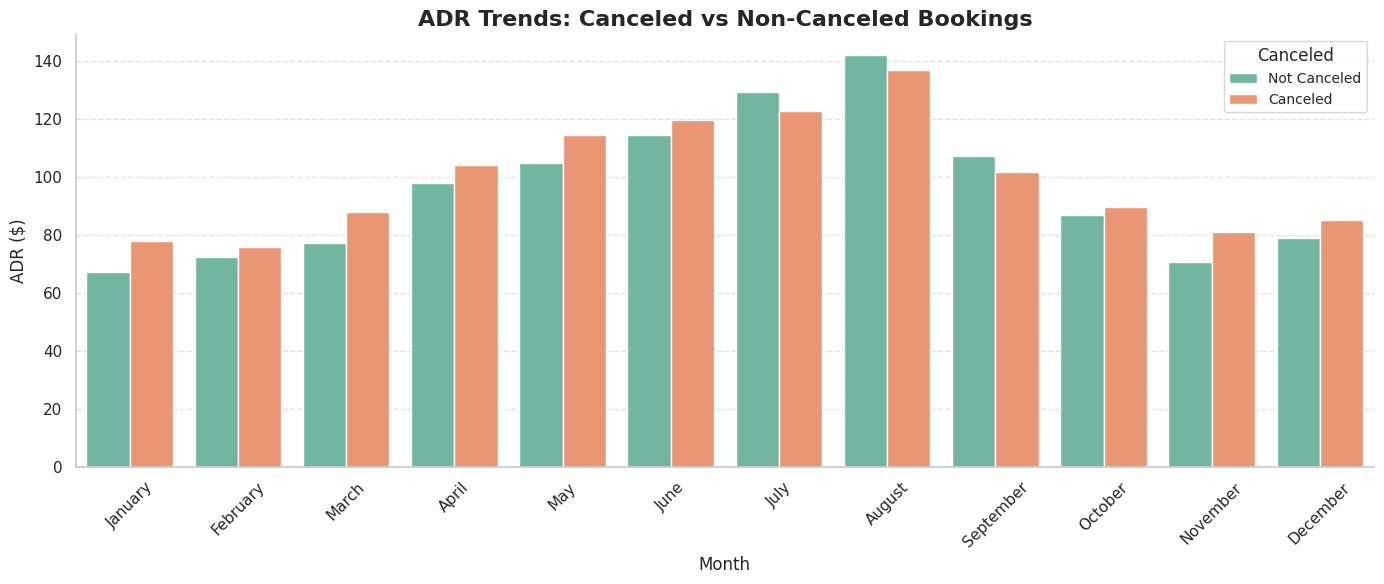

In [ ]:
cancellation_adr = df.groupby(['is_canceled', 'arrival_date_month'])['adr'].mean().reset_index()
cancellation_adr['is_canceled'] = cancellation_adr['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})
cancellation_adr['arrival_date_month'] = pd.Categorical(cancellation_adr['arrival_date_month'], categories=month_order, ordered=True)
cancellation_adr = cancellation_adr.sort_values('arrival_date_month')

plt.figure(figsize=(14, 6))
sns.barplot(
    data=cancellation_adr,
    x='arrival_date_month',
    y='adr',
    hue='is_canceled',
    palette='Set2'
)

plt.title("ADR Trends: Canceled vs Non-Canceled Bookings", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("ADR ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Canceled', title_fontsize=12, fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

Canceled bookings tend to have higher ADR (people book expensive rooms but cancel more).

Peak season cancellations hurt revenue more (lost high-value bookings).

# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4682B4;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;">Geographical distribution of users doing the bookings📊 </p>

In [ ]:
top_countries = df['country'].value_counts().head(10)

In [ ]:
top_countries

,count
country,
PRT,48586
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224


In [ ]:
country_map = {
    'PRT': 'Portugal',
    'GBR': 'UK',
    'FRA': 'France',
    'ESP': 'Spain',
    'DEU': 'Germany',
    'ITA': 'Italy',
    'IRL': 'Ireland',
    'BEL': 'Belgium',
    'BRA': 'Brazil',
    'NLD': 'Netherlands'
}

# Apply mapping
top_countries.index = top_countries.index.map(lambda x: country_map.get(x, x))

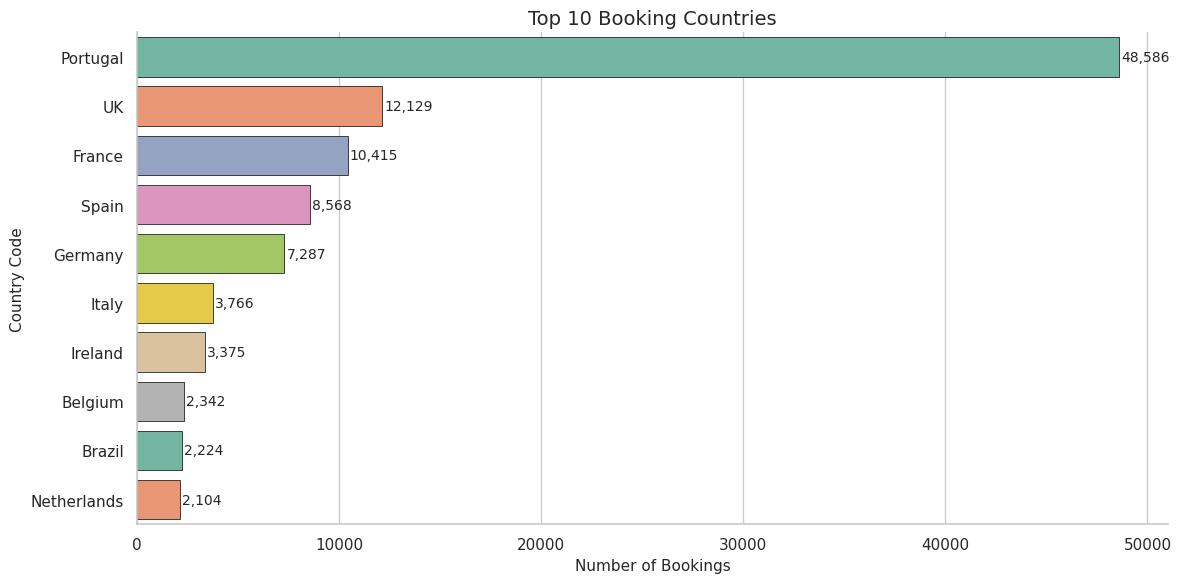

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette='Set2',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Top 10 Booking Countries', fontsize=14)
plt.xlabel('Number of Bookings', fontsize=11)
plt.ylabel('Country Code', fontsize=11)

# Add value labels
for i, value in enumerate(top_countries.values):
    plt.text(
        value + 100,
        i,
        f'{value:,}',
        va='center',
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

Portugal dominates with 48,586 bookings (73% of top 10 countries)

Next 9 countries combined = 52,210 bookings

# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FF8C00;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;">Booking Lead time distribution 🛠️ </p>


Min Lead Time: 0 days
Median: 69 days
75th Percentile: 160 days
Max: 737 days



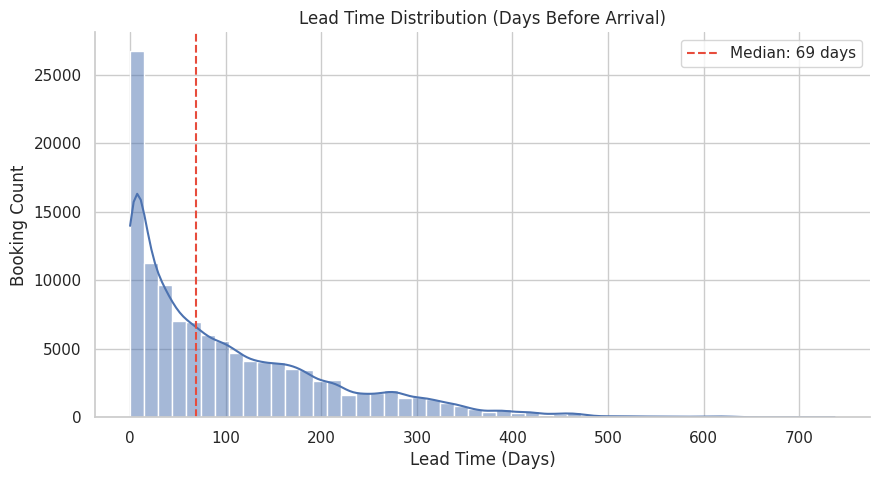

In [ ]:
# Quick-stats
print(f"""
Min Lead Time: {df['lead_time'].min()} days
Median: {df['lead_time'].median():.0f} days
75th Percentile: {df['lead_time'].quantile(0.75):.0f} days
Max: {df['lead_time'].max():.0f} days
""")

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['lead_time'], bins=50, kde=True, palette='Set2')
plt.axvline(df['lead_time'].median(), color='#e74c3c', linestyle='--',
            label=f'Median: {df["lead_time"].median():.0f} days')
plt.title('Lead Time Distribution (Days Before Arrival)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Booking Count')
plt.legend()
sns.despine()
plt.show()

Same-day bookings (0 days) to 2+ years ahead (737 days)

Median at 69 days → Most bookings made 2 months in advance

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
  <p style="background-color:#6A5ACD;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;"> Time Series Variable Distribution </p>
</div>

In [ ]:
NumberOfGuests_Daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 793 entries, 2015-07-01 to 2017-08-31
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Total Guests  793 non-null    int64
dtypes: int64(1)
memory usage: 12.4 KB


In [ ]:
NumberOfGuests_Daily.describe()

,Total Guests
count,793.000000
mean,183.136192
std,68.981344
min,24.000000
25%,130.000000
50%,187.000000
75%,228.000000
max,520.000000


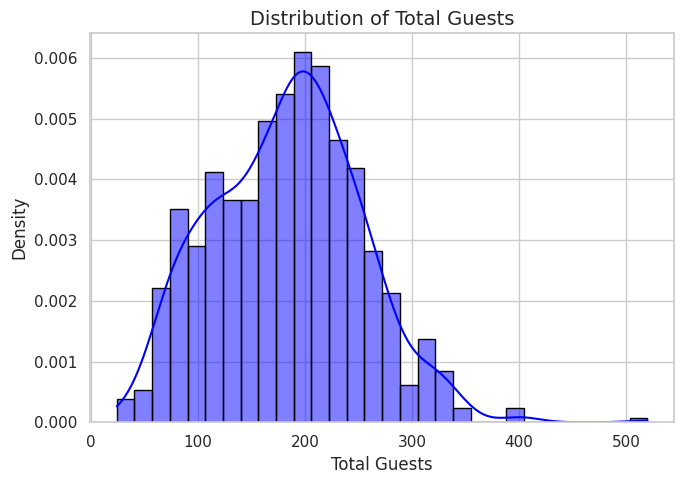

In [ ]:
plt.figure(figsize=(7, 5))

sns.histplot(NumberOfGuests_Daily['Total Guests'], kde=True, stat="density", bins=30, color='blue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

plt.title("Distribution of Total Guests", fontsize=14)
plt.xlabel("Total Guests", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#express to plot entire data
fig = px.line(NumberOfGuests_Daily.reset_index(), x='arrival_date', y='Total Guests', title='Hotel Demand')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(count=3, label='3y', step="year", stepmode="backward")
        ])
    )
)
fig.show()

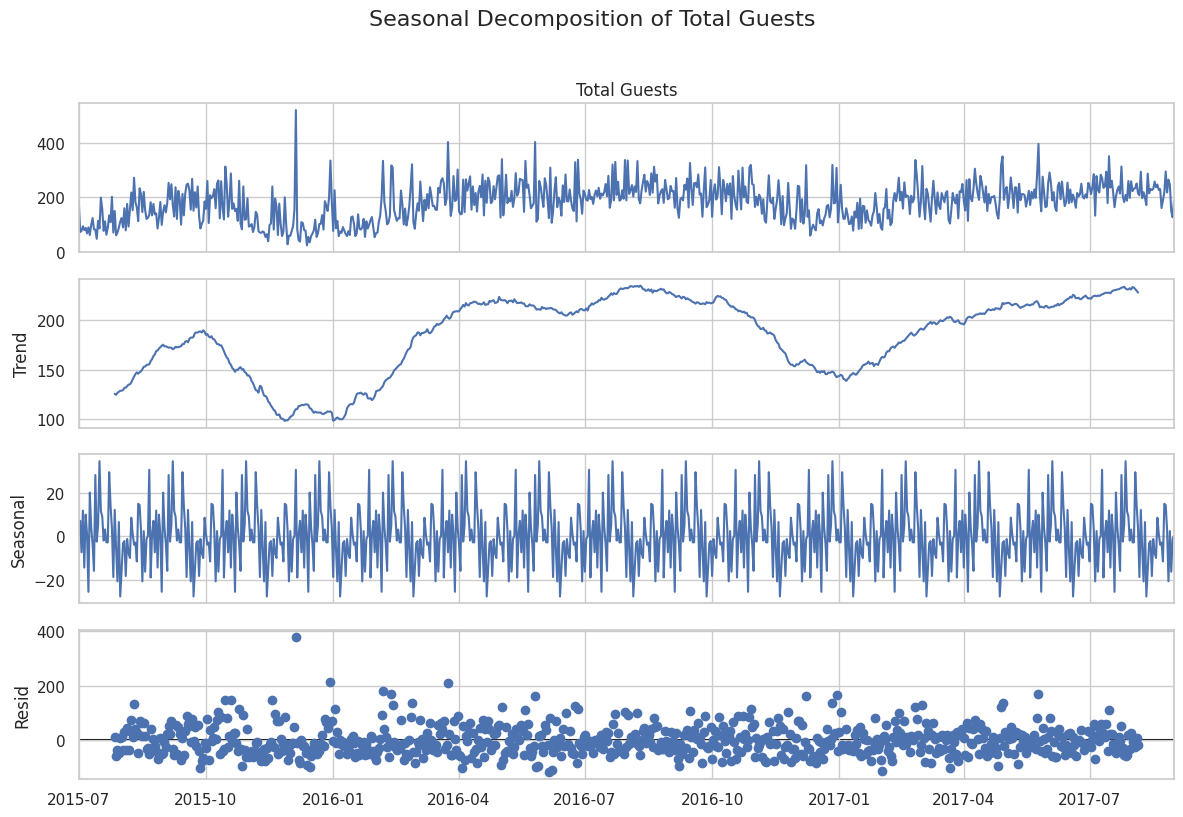

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(
    NumberOfGuests_Daily['Total Guests'],
    model='additive',
    period=53
)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Seasonal Decomposition of Total Guests", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
